In [1]:
# project: p9
# submitter: achandrashe4
# partner: none

In [2]:
import csv
import copy 
import matplotlib
import pandas

# Allows you to render matplotlib graphs in the same notebook
%matplotlib inline 

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

In [3]:
import csv

def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

In [4]:
def get_mapping(path):
    csv_rows = process_csv(path)
    csv_data = csv_rows[1:]
    ids_to_names = {}
    for i in range(len(csv_rows)):
        ids_to_names[csv_rows[i][0]] = csv_rows[i][1]
    return ids_to_names

In [5]:
def get_raw_movies(path):
    csv_rows = process_csv(path)
    header = csv_rows[0]
    csv_data = csv_rows[1:]
    dict_list = []
    for row in csv_data:
        new_row = {}
        for index in range(len(row)):
            if header[index] == "year":
                row[index] = int(row[index])
            if header[index] == "rating":
                row[index] = float(row[index])
            if header[index] == "directors" or header[index] == "actors" or header[index] == "genres":
                row[index] = row[index].split(",")
            new_row[header[index]] = row[index]
        dict_list.append(new_row)
    return dict_list

In [6]:
def get_movies(movies_path, mapping_path):
    mapping = get_mapping(mapping_path)
    movie_mapping = get_raw_movies(movies_path)
    
    for movie in range(len(movie_mapping)):
        for key1 in movie_mapping[movie]:
            for key2 in mapping:
                if movie_mapping[movie][key1] == key2:
                    movie_mapping[movie][key1] = mapping[key2]
            
        directors_list = movie_mapping[movie]["directors"]
        for director in range(len(directors_list)):
            for key2 in mapping:
                if directors_list[director] == key2:
                    directors_list[director] = mapping[key2]
    
    
        actors_list = movie_mapping[movie]["actors"]
        for actor in range(len(actors_list)):
            for key2 in mapping:
                if actors_list[actor] == key2:
                    actors_list[actor] = mapping[key2]
    return movie_mapping

In [7]:
def title_vs_rating(actor_name):
    title_to_rating = {}
    for movie in movies:
        if actor_name in movie["actors"]:
            title_to_rating[movie["title"]] = movie["rating"]
    return title_to_rating

In [8]:
def movies_per_genre():
    genre_to_num_movies = {}
    for movie in movies:
        for genre in movie["genres"]:
            if not genre in genre_to_num_movies:
                genre_to_num_movies[genre] = 0
            genre_to_num_movies[genre] += 1
    return genre_to_num_movies

In [9]:
def movies_per_actor():
    actor_to_num_movies = {}
    for movie in movies:
        for actor in movie["actors"]:
            if not actor in actor_to_num_movies:
                actor_to_num_movies[actor] = 0
            actor_to_num_movies[actor] += 1
    return actor_to_num_movies

In [10]:
movies = get_movies("movies.csv", "mapping.csv")

In [11]:
#q1 Find the average rating for movies with less than 4 actors (length of actor list < 4)?
ratings_list = []
for movie in movies:
    if len(movie["actors"]) < 4:
        ratings_list.append(movie["rating"])
average_rating = sum(ratings_list) / len(ratings_list)
average_rating

6.380867346938772

In [12]:
#q2 Find the average rating for movies with more than 5 actors (length of actor list > 5) ?
ratings_list = []
for movie in movies:
    if len(movie["actors"]) > 5:
        ratings_list.append(movie["rating"])
average_rating = sum(ratings_list) / len(ratings_list)
average_rating

6.742857142857143

In [13]:
#q3 What is the average rating of movies which start with the letter 'a' (case insensitive)?
ratings_list = []
for movie in movies:
    if movie["title"].startswith("a".upper()): #check this again!!!
        ratings_list.append(movie["rating"])
average_rating = sum(ratings_list) / len(ratings_list)
average_rating

6.413599999999994

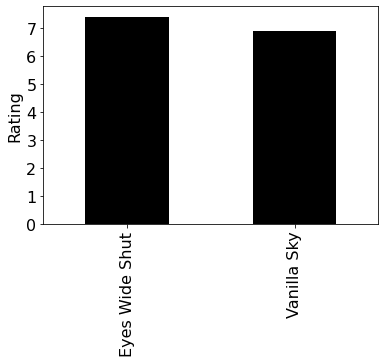

In [14]:
#q4 Plot the title vs rating of movies featuring "Tom Cruise".
tom_cruise_plot = title_vs_rating("Tom Cruise")
plot_dict(tom_cruise_plot, "Rating")

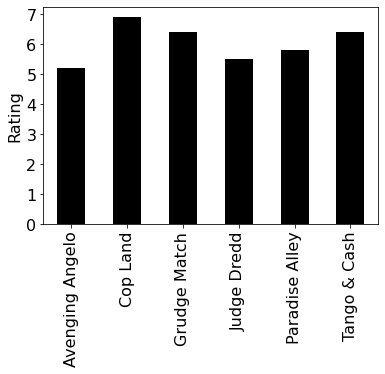

In [15]:
#q5 Plot the title vs rating of movies featuring "Sylvester Stallone".
sylvester_stallone_plot = title_vs_rating("Sylvester Stallone")
plot_dict(sylvester_stallone_plot, "Rating")

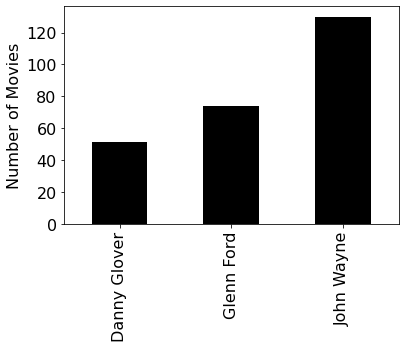

In [16]:
#q6 Plot the number of movies played by ["John Wayne", "Glenn Ford", "Danny Glover"].
actors_list = ["John Wayne", "Glenn Ford", "Danny Glover"]
actor_to_num_movies = {}
for actor in actors_list:
    actor_to_num_movies[actor] = 0
    for movie in movies:
        if actor in movie["actors"]:
            actor_to_num_movies[actor] += 1
plot_dict(actor_to_num_movies, "Number of Movies")

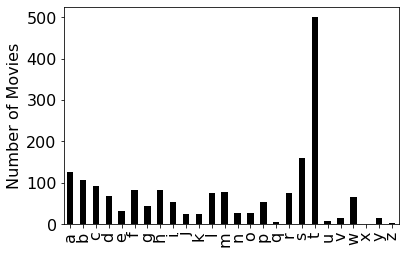

In [17]:
#q7 Plot the number of movies that start with each letter of the alphabet.
letters = "abcdefghijklmnopqrstuvwxyz"
letter_to_num_movies = {}
for letter in letters:
    letter_to_num_movies[letter] = 0
    for movie in movies:
        if movie["title"].lower().startswith(letter):
            letter_to_num_movies[letter] += 1
plot_dict(letter_to_num_movies, "Number of Movies")

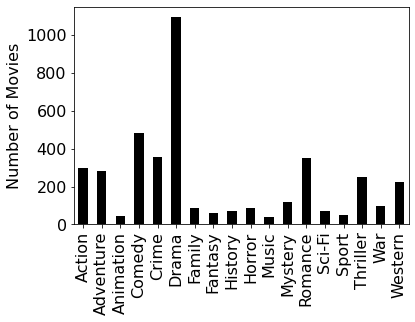

In [18]:
#q8: Plot the number of movies there are for each genre.
plot_dict(movies_per_genre(), "Number of Movies")

In [19]:
#q9 For each letter of the alphabet (except 'x'), what is the average rating of movies that start with that letter (case insensitive)?
letters = "abcdefghijklmnopqrstuvwyz" # No x this time!
letter_to_num_movies = {}
for letter in letters:
    letter_to_num_movies[letter] = []
    for movie in movies:
        if movie["title"].startswith(letter.upper()):
            letter_to_num_movies[letter].append(movie["rating"])
for letter in letter_to_num_movies:
    letter_to_num_movies[letter] = sum(letter_to_num_movies[letter]) / len(letter_to_num_movies[letter])
letter_to_num_movies

{'a': 6.413599999999994,
 'b': 6.312264150943395,
 'c': 6.337362637362637,
 'd': 6.297101449275363,
 'e': 6.128125000000001,
 'f': 6.375609756097562,
 'g': 6.443181818181819,
 'h': 6.476829268292684,
 'i': 6.714814814814817,
 'j': 6.375,
 'k': 6.316666666666666,
 'l': 6.172368421052631,
 'm': 6.650000000000002,
 'n': 6.348148148148147,
 'o': 6.5814814814814815,
 'p': 6.160377358490566,
 'q': 6.7,
 'r': 6.371052631578949,
 's': 6.216352201257862,
 't': 6.5432000000000015,
 'u': 6.15,
 'v': 6.1000000000000005,
 'w': 6.243076923076923,
 'y': 6.285714285714286,
 'z': 6.833333333333333}

In [20]:
#q10 What is the average movie rating for each genre?
genre_to_rating = {}
for movie in movies:
    for genre in movie["genres"]:
        if not genre in genre_to_rating:
            genre_to_rating[genre] = []
        genre_to_rating[genre].append(movie["rating"])
for genre in genre_to_rating:
    genre_to_rating[genre] = sum(genre_to_rating[genre]) / len(genre_to_rating[genre])
genre_to_rating

{'Comedy': 6.3146391752577395,
 'Drama': 6.529707495429615,
 'Romance': 6.474147727272729,
 'History': 6.661643835616438,
 'Family': 6.512941176470589,
 'Mystery': 6.275206611570249,
 'Thriller': 5.981999999999998,
 'Action': 6.125752508361202,
 'Crime': 6.355182072829133,
 'Adventure': 6.612367491166079,
 'Western': 6.455309734513275,
 'Music': 6.3947368421052655,
 'Animation': 7.1533333333333315,
 'Sport': 6.527083333333334,
 'Fantasy': 6.405084745762712,
 'War': 6.771717171717175,
 'Sci-Fi': 6.104347826086958,
 'Horror': 5.724705882352941}

In [21]:
#q11 How many movies in each genre have a rating of above 4.0? (rating > 4.0)
genre_to_rating_above_four = {}
for movie in movies:
    for genre in movie["genres"]:
        if not genre in genre_to_rating_above_four:
            genre_to_rating_above_four[genre] = 0
        if movie["rating"] > 4.0:
            genre_to_rating_above_four[genre] += 1
genre_to_rating_above_four

{'Comedy': 484,
 'Drama': 1085,
 'Romance': 352,
 'History': 73,
 'Family': 84,
 'Mystery': 117,
 'Thriller': 243,
 'Action': 289,
 'Crime': 351,
 'Adventure': 280,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 47,
 'Fantasy': 58,
 'War': 99,
 'Sci-Fi': 67,
 'Horror': 81}

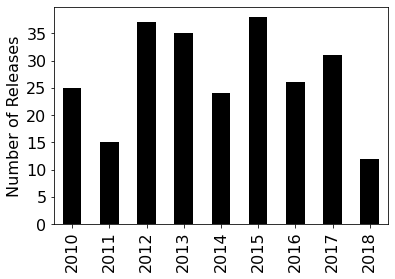

In [22]:
#q12 Plot the number of movies that were released each year in the last decade (2010<= year <=2020)
year_to_num_releases = {}
for movie in movies:
    if 2010 <= movie["year"] <= 2020:
        if not movie["year"] in year_to_num_releases:
            year_to_num_releases[movie["year"]] = 0
        year_to_num_releases[movie["year"]] += 1
plot_dict(year_to_num_releases, "Number of Releases")

In [23]:
#q13 Which year (or years) had the highest number of movie releases?
year_to_num_releases = {}
years_with_highest_num_releases = []
for movie in movies:
    if not movie["year"] in year_to_num_releases:
        year_to_num_releases[movie["year"]] = 0
    year_to_num_releases[movie["year"]] += 1
for year in year_to_num_releases:
    if year_to_num_releases[year] == max(year_to_num_releases.values()):
        years_with_highest_num_releases.append(year)
years_with_highest_num_releases

[2015]

In [24]:
#q14 Which 5 genres have the least number of movies?
genre_list = []
genre_to_num_movies = movies_per_genre()
for genre in genre_to_num_movies:
    genre_list.append(genre)
def genre_sort(genre_name):
    return genre_to_num_movies[genre_name]
genre_list = sorted(genre_list, key = genre_sort)
genre_list[:5]

['Music', 'Animation', 'Sport', 'Fantasy', 'Sci-Fi']

In [25]:
#q15 Which 5 genres have the most number of movies?
genre_list[-5:]

['Action', 'Romance', 'Crime', 'Comedy', 'Drama']

In [26]:
#q16 Which 10 actors are featured in the most movies?
actor_list = []
actor_to_num_movies = movies_per_actor()
for actor in actor_to_num_movies:
    actor_list.append(actor)
def actor_sort(actor_name):
    return actor_to_num_movies[actor_name]
actors_list = sorted(actor_list, key = actor_sort)
actors_list[-10:]

['Robert De Niro',
 'Robert Mitchum',
 'Glenn Ford',
 'George Sanders',
 'Randolph Scott',
 'Henry Fonda',
 'Anthony Quinn',
 'Mickey Rooney',
 'Eric Roberts',
 'John Wayne']

In [27]:
#q17 Which actor has played in the greatest number of movies?
actors_list[-1]

'John Wayne'

In [28]:
#q18 How many actors have only acted in only 1 movie?
actors_in_one_movie = []
for actor in actor_to_num_movies:
    if actor_to_num_movies[actor] == 1:
        actors_in_one_movie.append(actor)
len(actors_in_one_movie)

1926

In [29]:
#q19 What are the titles of the top 3 rated movies in the dataset?
titles = []
title_to_rating = {}
for movie in movies:
    for title in [movie["title"]]:
        title_to_rating[title] = movie["rating"]
for title in title_to_rating:
    titles.append(title)
def rating_sort(movie_title):
    return title_to_rating[movie_title]
titles = sorted(titles, key = rating_sort)
titles[-3:]

['The Godfather: Part II', 'The Dark Knight', 'The Godfather']

In [30]:
#q20 What are the titles of the bottom 19 rated movies in the dataset?
titles[:19]

['Silk',
 'Stealing Las Vegas',
 'Singularity',
 'Body and Soul',
 'Garden of the Dead',
 'Beyond the Ring',
 "Hitman's Run",
 'Betrayal',
 "Jake's Road",
 'The Trouble with Spies',
 '2 Bedroom 1 Bath',
 'Victim of Desire',
 'Arsenal',
 'Woman of Desire',
 'Sweet Justice',
 'Falcon Beach',
 'The Flying Dutchman',
 'The Mark: Redemption',
 'The Steam Experiment']